In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
from matplotlib.ticker import FuncFormatter

In [2]:
# !pip install PyPortfolioOpt

     |████████████████████████████████| 48 kB 1.2 MB/s eta 0:00:011
     |████████████████████████████████| 11.7 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 39.0 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 126 kB 700 kB/s eta 0:00:01
     |████████████████████████████████| 215 kB 712 kB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 921 kB 278 kB/s eta 0:00:01
  Created wheel for cvxpy: filename=cvxpy-1.1.7-cp38-cp38-linux_x86_64.whl size=3748222 sha256=f058104c164ae2553f7619b6550510a8cb3bfa93134012ec83d8eca09ba48e47
  Stored in directory: /home/jorgelameira/.cache/pip/wheels/51/a4/25/decef34c7e5328b040c66f7bc3ca49bd6a22dae43f0230e848
  Created wheel for ecos: filename=ecos-2.0.7.post1-cp38-cp38-linux_x86_64.whl size=194874 sha256=6382c12b40cb7fa2c4

In [32]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.cla import CLA
from pypfopt import plotting as Plotting
from pypfopt import discrete_allocation

In [12]:
tickers = ['BSX','AES','BRK-B','SEE','QQQ','SPY']

price_data = []

for ticker in range(len(tickers)):
    prices = web.DataReader(tickers[ticker], start="2018-01-01", data_source="yahoo")
    prices = prices.assign(ticker=ticker)[["Adj Close"]]
    price_data.append(prices)

df_stocks = pd.concat(price_data, axis=1)
df_stocks.columns=tickers


In [13]:
df_stocks

,BSX,AES,BRK-B,SEE,QQQ,SPY
Date,,,,,,
2018-01-02,25.280001,9.779798,197.220001,47.066479,154.995071,254.112717
2018-01-03,25.559999,9.770807,199.789993,47.104576,156.501114,255.719986
2018-01-04,25.320000,9.734852,200.690002,47.209347,156.774933,256.797821
2018-01-05,25.969999,9.770807,201.419998,47.066479,158.349411,258.509186
2018-01-08,25.809999,9.770807,202.740005,47.276005,158.965546,258.981873
...,...,...,...,...,...,...
2021-01-15,36.330002,27.600000,233.490005,44.400002,311.859985,375.700012
2021-01-19,36.270000,28.059999,234.550003,43.220001,316.410004,378.649994
2021-01-20,36.660000,28.020000,234.759995,44.560001,323.769989,383.890015


In [17]:
df_stocks.isnull().sum(), df_stocks.isna().sum()

(BSX      0
 AES      0
 BRK-B    0
 SEE      0
 QQQ      0
 SPY      0
 dtype: int64,
 BSX      0
 AES      0
 BRK-B    0
 SEE      0
 QQQ      0
 SPY      0
 dtype: int64)

In [35]:
mu = expected_returns.mean_historical_return(df_stocks)

In [36]:
sigma = risk_models.sample_cov(df_stocks)

In [37]:
ef = EfficientFrontier(mu, sigma, weight_bounds=(-1, 1))

In [38]:
sharpe = ef.max_sharpe()

In [39]:
minvol_pwt = ef.clean_weights()

In [40]:
print(sharpe_pwt)

OrderedDict([('BSX', -0.13149), ('AES', 1.0), ('BRK-B', -0.96468), ('SEE', -0.5035), ('QQQ', 1.0), ('SPY', 0.59967)])


In [41]:
latest_prices = discrete_allocation.get_latest_prices(df_stocks)

In [42]:
allocation_minv, rem_minv = discrete_allocation.DiscreteAllocation(minvol_pwt, latest_prices, total_portfolio_value=1000000).lp_portfolio()

In [51]:
allocation_minv, rem_minv

({'AES': 14195,
  'QQQ': 1182,
  'SPY': 602,
  'BSX': -664,
  'BRK-B': -777,
  'SEE': -2075},
 196.01800727844238)

In [45]:
ef.portfolio_performance(verbose=True, risk_free_rate = 1.10)

Expected annual return: 69.2%
Annual volatility: 42.9%
Sharpe Ratio: -0.95


(0.6918806855084072, 0.4290901728318139, -0.9511271530601081)

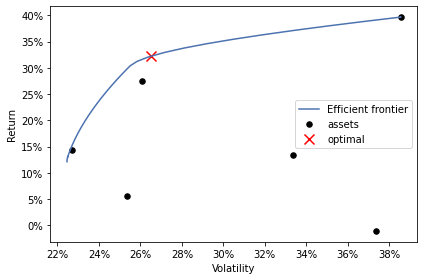

In [48]:
cl_obj = CLA(mu, sigma)
ax = Plotting.plot_efficient_frontier(cl_obj, showfig = False)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

In [49]:
print(allocation_minv)
print("Leftover Fund value in$ after building minimum volatility portfolio is ${:.2f}".format(rem_minv))

{'AES': 14195, 'QQQ': 1182, 'SPY': 602, 'BSX': -664, 'BRK-B': -777, 'SEE': -2075}
Leftover Fund value in$ after building minimum volatility portfolio is $196.02
